In [2]:
import numpy as np

In [3]:
np.random.seed(100)

In [4]:
duration = 2
sampling_rate = 30000
n_samples = duration * sampling_rate

In [5]:
def signal_func(t: np.array, num: int = 13) -> np.array:
    freqs: np.array = np.random.normal(4000, 1000, num)
    ampls: np.array = np.random.normal(5.0, 2.5, num)
    phases: np.array = np.random.uniform(0, 2*np.pi, num)

    signal = np.zeros_like(t)

    for ampl, freq, phase in zip(ampls, freqs, phases):
        signal += ampl * np.sin(2 * np.pi * freq * t + phase)

    additional_freqs: np.array = np.concatenate((np.random.uniform(10, 3000, 50),
                                                np.random.uniform(5000, 15000, 50)))
    additional_ampls: np.array = np.random.uniform(0.01, 0.5, 100)

    for freq, ampl in zip(additional_freqs, additional_ampls):
        signal += ampl * np.sin(2 * np.pi * freq * t)

    noise = np.random.normal(0, np.random.uniform(0.1, 0.4), len(t))
    signal += noise

    return signal

In [6]:
t = np.linspace(0, duration, n_samples)

In [7]:
signal = signal_func(t)

In [8]:
def rmse(y_true: np.array, y_pred: np.array) -> float:
    return np.sqrt(np.square(np.subtract(y_true, y_pred)).mean())

In [9]:
import matplotlib.pyplot as plt

In [10]:
def median_smoothing(signal: np.array):
    median_smoothing_signal = np.zeros_like(signal)

    window_size = 10
    half_window = window_size // 2
    for i in range(len(signal)):
        start = max(0, i - half_window)
        end = min(len(signal), i + half_window + 1)

        median_smoothing_signal[i] = np.median(signal[start:end])

    return median_smoothing_signal

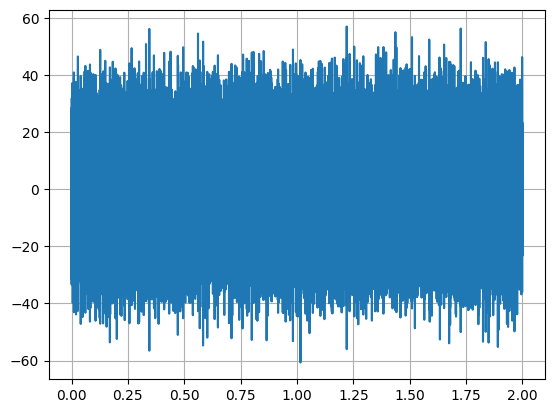

In [11]:
plt.plot(t, signal)
plt.grid(True)
plt.show()

In [12]:
median_signal = median_smoothing(signal)

In [13]:
rmse(signal, median_signal)

19.327313733999997

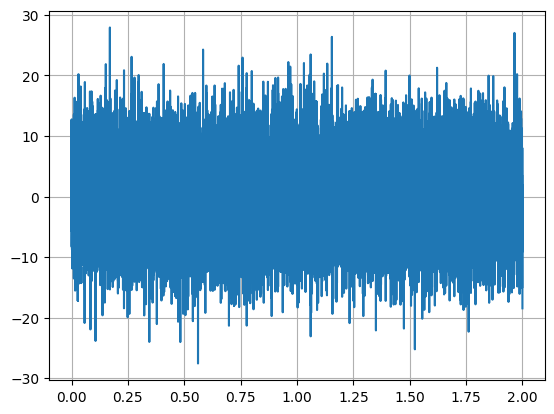

In [14]:
plt.plot(t, median_signal)
plt.grid(True)
plt.show()